In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
feature = 'Pclass'

In [9]:
data['Pcl']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [13]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [12]:
numerical_features = ["Age", "Fare"]

In [14]:
numerical_data = data[numerical_features]

In [15]:
numerical_pipeline = Pipeline(
            [
                ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
                ('scaler', StandardScaler())
            ]
        )

<AxesSubplot:>

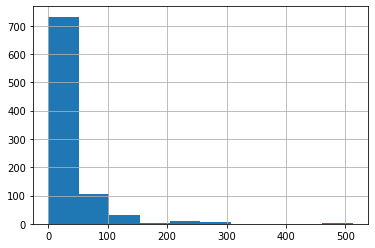

In [18]:
data['Fare'].hist()

<AxesSubplot:>

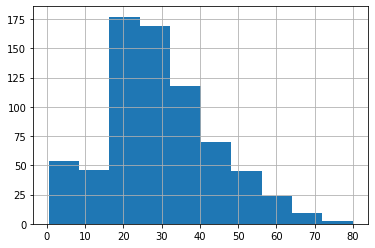

In [17]:
data['Age'].hist()

In [16]:
numerical_data

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [19]:
scaled_numerical_data = numerical_pipeline.fit_transform(numerical_data)

In [21]:
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

In [23]:
scaled_numerical_data.head()

,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


In [28]:
data[['Sex']]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [31]:
data[numerical_features] = numerical_pipeline.transform(data[numerical_features])

In [32]:
data[numerical_features]

,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
...,...,...
886,-0.207709,-0.386671
887,-0.823344,-0.044381
888,0.000000,-0.176263
889,-0.284663,-0.044381


In [ ]:
sex_female, sex_male

In [29]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


<AxesSubplot:>

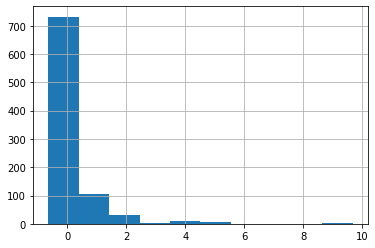

In [26]:
scaled_numerical_data['Fare'].hist()

In [24]:
numerical_data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
numerical_pipeline

In [11]:
data['Age'].std()

14.526497332334044

In [7]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
